# Statistical_Analysis

In [1]:
section_fig_main_title = 'Statistical_Analysis_'

In [2]:
!which python

In [3]:
import sys
print(sys.executable)


/Users/amin/anaconda3/bin/python


In [4]:
import os, sys
import requests
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from urllib.parse import urljoin, urlparse
# from bs4 import BeautifulSoup as bs
import re
import statsmodels.api as sm
import pingouin as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot
import researchpy as rp
from tensorflow import keras

from sklearn.metrics import r2_score
from math import sqrt
import json

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
# !/Users/amin/Desktop/proj/env/bin/python -m pip install xgboost

from sklearn.metrics import r2_score,mean_absolute_error

# !/Users/amin/anaconda3/bin/python -m pip install --upgrade tensorflow 
# pip install --upgrade tensorflow 

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

import math
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from pandas.plotting import autocorrelation_plot
import gif

/Users/amin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/amin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/amin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/amin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [5]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

import tensorflow as tf
print(tf.__version__)

import gif
from tqdm import tqdm

from sklearn import metrics
# import statsmoadels.api as sm

1.13.1


## Read Data 



In [6]:
csv_path = "../Data/Data_ICME_Edited_out_P02_02.csv"
df = pd.read_csv(csv_path, infer_datetime_format=True)


df['ICME Plasma/Field Start Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df['ICME Plasma/Field End Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field End Y/M/D (UT) (b)'])


df.index = df['ICME Plasma/Field Start Y/M/D (UT) (b)']
df = df.drop(columns=['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df = df.drop(columns=['ICME Plasma/Field End Y/M/D (UT) (b)'])

In [7]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)'],
      dtype='object')

# Hypothesis Questions

## BDE

Evidence of BiDirectional suprathermal Electron strahls (BDE) in ACE/SWEPAM Observations. If data are unavailable from SWEPAM (data commence on 10/22/97), observations from the 3-D P instrument on WIND are referred to. "SEP" indicates that an intense solar energetic particle event was in progress at the time of ICME passage and electron flows therefore cannot be determined.

[Reference](http://www.srl.caltech.edu/ACE/ASC/DATA/level3/icmetable2.htm#(e))

In [8]:
col1 = 'BDE? (e)'
col2_numer = 'V_ICME (km/s) (i)'

print('num of uniq', col1 ,'\n', df[col1].unique())

df[col1].nunique()

num of uniq BDE? (e) 
 ['N' 'Y' '...' 'SEP']


4

In [9]:
# target_grp = df.groupby([col1])

# sub_df = target_grp[col2_numer]
# target_grp[col2_numer].mean().plot.barh()
# plt.xlabel(col2_numer)
# plt.show()

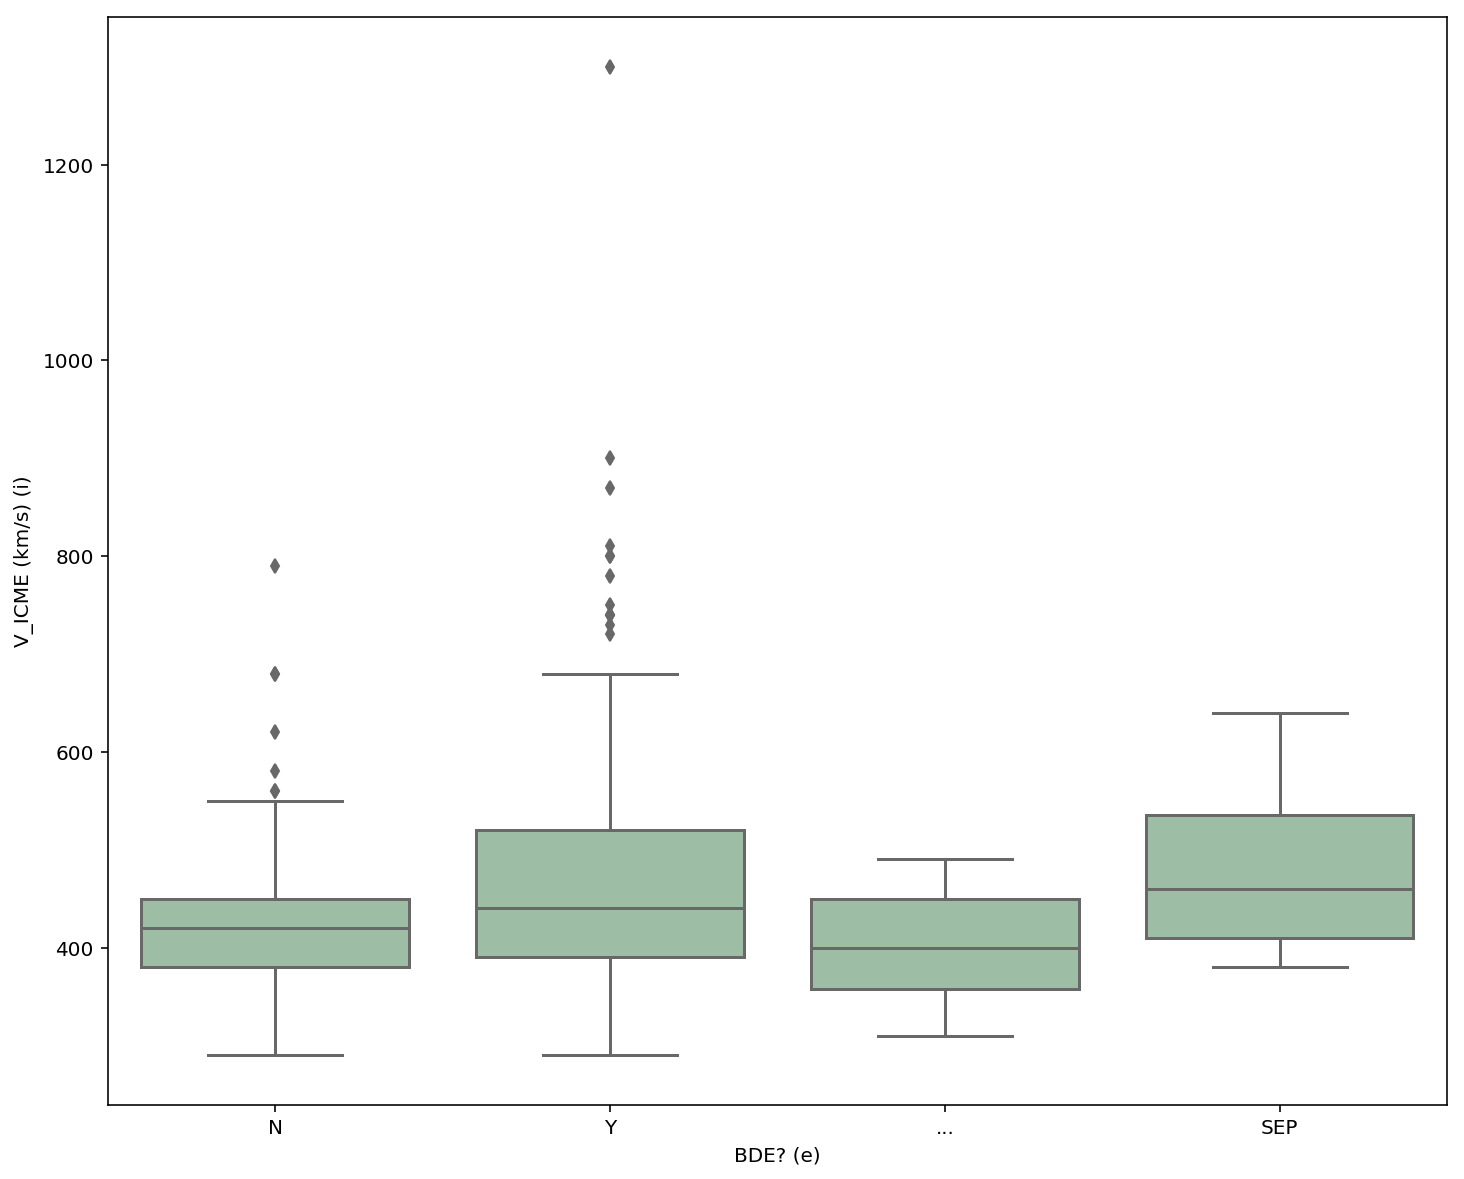

In [10]:
# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(12,10))

sns.boxplot(x=col1, y=col2_numer, data=df, color='#99c2a2')
# ax = sns.swarmplot(x=col1, y=col2_numer, data=df, color='#7d0013')
plt.show()

In [11]:
ICME_V_BDE_Y = df[df['BDE? (e)'] == 'Y']['V_ICME (km/s) (i)']
ICME_V_BDE_N = df[df['BDE? (e)'] == 'N']['V_ICME (km/s) (i)']
ICME_V_BDE_SEP = df[df['BDE? (e)'] == 'SEP']['V_ICME (km/s) (i)']

In [12]:
print(ICME_V_BDE_Y.mean())
print(ICME_V_BDE_N.mean())
print(ICME_V_BDE_SEP.mean())

468.2369942196532
426.02649006622516
485.0


From the above plot, it seems that I can infer that the solar speed for those data that there is evidence of bi-directional suprathermal electron (Y) is higher in average compared to those that there no evidence reported. is a difference in average solar wind speed observed from data statistically significant?


<span style="color:gray">
    
H0: Nothing extraordinary going on! The average solar wind speed is constant whether there are Bidirectional suprathermal Electron strahls happen or Not.

</span>


<span style="color:blue">
Ha: Average solar wind speed is higher when Bidirectional suprathermal Electron strahls happen!
</span>



<span style="color:red">
    
## Does Average solar wind speed is higher when Bidirectional suprathermal Electron strahls happen?
</span>

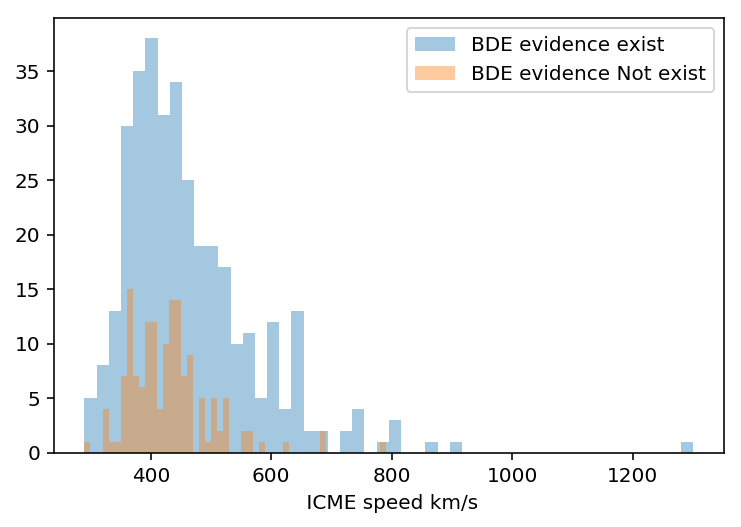

In [13]:
plt.hist(ICME_V_BDE_Y, bins=50, alpha=0.4,label='BDE evidence exist')
plt.hist(ICME_V_BDE_N, bins=50, alpha=0.4,label='BDE evidence Not exist')
plt.xlabel(' ICME speed km/s')
plt.legend()
plt.savefig('../Figures/Statistical_Analysis_H0_1.png')
plt.show()

### t-test independent

I have two samples so I use two sample t-test (t test independent).

In [14]:
stats.ttest_ind(a = ICME_V_BDE_Y,
                b = ICME_V_BDE_N)

Ttest_indResult(statistic=4.231118622668038, pvalue=2.771368873951386e-05)

The p-value is less than 0.05 therefore we can reject the null hypothesis (H0) and accept that there is a significant difference between the solar storm speed (ICME speed) when there is evidence of BDE with when there is no BDE evidence. In another word, the H1 is correct.

<span style="color:green">
    
## Ha: Average solar wind speed is higher when Bidirectional suprathermal Electron strahls happen. 
At least I have not any evidence against it. In more conservative way, I should say that the average is different.

</span>
The p-value is pretty small therefore I have a high confidence level and the chance of Type 1 error (false positive) is low.


I see from bar plot that the average ICME speed when intense solar energetic particle event was going on is higher than when there was Bidirectional suprathermal Electron strahls happen. Is this observaition from data statistically sognificant or not? So here is my Null hypothesis: 


<span style="color:gray">
    
H0: The average solar wind speed when Bidirectional suprathermal Electron strahls happen is not different than when intense solar energetic particle event is happening. the observed different is ICME speed is due to error.

</span>


<span style="color:blue">
Ha: The average solar wind speed when Bidirectional suprathermal Electron strahls happen is not equal to when intense solar energetic particle event is happening and it is actually lower.
</span>

I have two independant samples therefore, I use two sample t-test (t test independent).

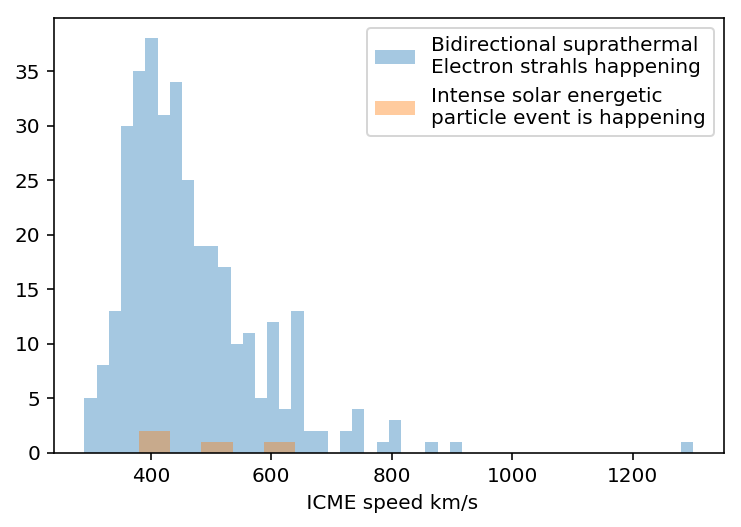

In [15]:
plt.hist(ICME_V_BDE_Y, bins=50, alpha=0.4,label='Bidirectional suprathermal \nElectron strahls happening')
plt.hist(ICME_V_BDE_SEP, bins=5, alpha=0.4,label='Intense solar energetic \nparticle event is happening')
plt.xlabel(' ICME speed km/s')
plt.legend()
plt.savefig('../Figures/Statistical_Analysis_H0_2.png')
plt.show()

### t-test independent

In [16]:
stats.ttest_ind(a = ICME_V_BDE_Y,
                b = ICME_V_BDE_SEP)

Ttest_indResult(statistic=-0.2943973492407707, pvalue=0.7686298196205192)

based on p-value from ttest_ind above, the alternative hypothesis is rejected. The observed difference from data is not significant enought to reject the null hypothesis (H0), therefore I stick to H0 and conclude:


<span style="color:green">
    
## H0: The average solar wind speed when Bidirectional suprathermal Electron strahls happen is not different than when intense solar energetic particle event is happening. The observed difference in ICME speed is just due to noise. Although the data shows that when the intense solar energetic particle event is happening the solar wind speed is higher in average, compare to when Bidirectional suprathermal Electron strahls. However it is not statistically significant.

</span>


Checking out the number of data point with ```SEP``` below, it is seen that we do have just 4 rows of data which is not enougth to come up with a solid conclusion about the average ICME speed.

In [17]:
len(ICME_V_BDE_SEP)

4

# "quality" of the boundary times

The "quality" of the boundary times (`1' indicating the most reliable) based on assessment of the various data sets, including plasma, magnetic field and solar wind composition/charge states. 'W' indicates that the overall ICME signatures are particularly weak.

[Reference](http://www.srl.caltech.edu/ACE/ASC/DATA/level3/icmetable2.htm#(e))

In [18]:
# col1 = 'Qual. (g)'
# col2_numer = 'V_ICME (km/s) (i)'

# print('num of uniq', col1 ,'  \n', df[col1].unique())

# df[col1].unique()

# target_grp = df.groupby([col1])

# target_grp[col2_numer].mean().plot.barh()
# plt.xlabel(col2_numer)
# plt.show()

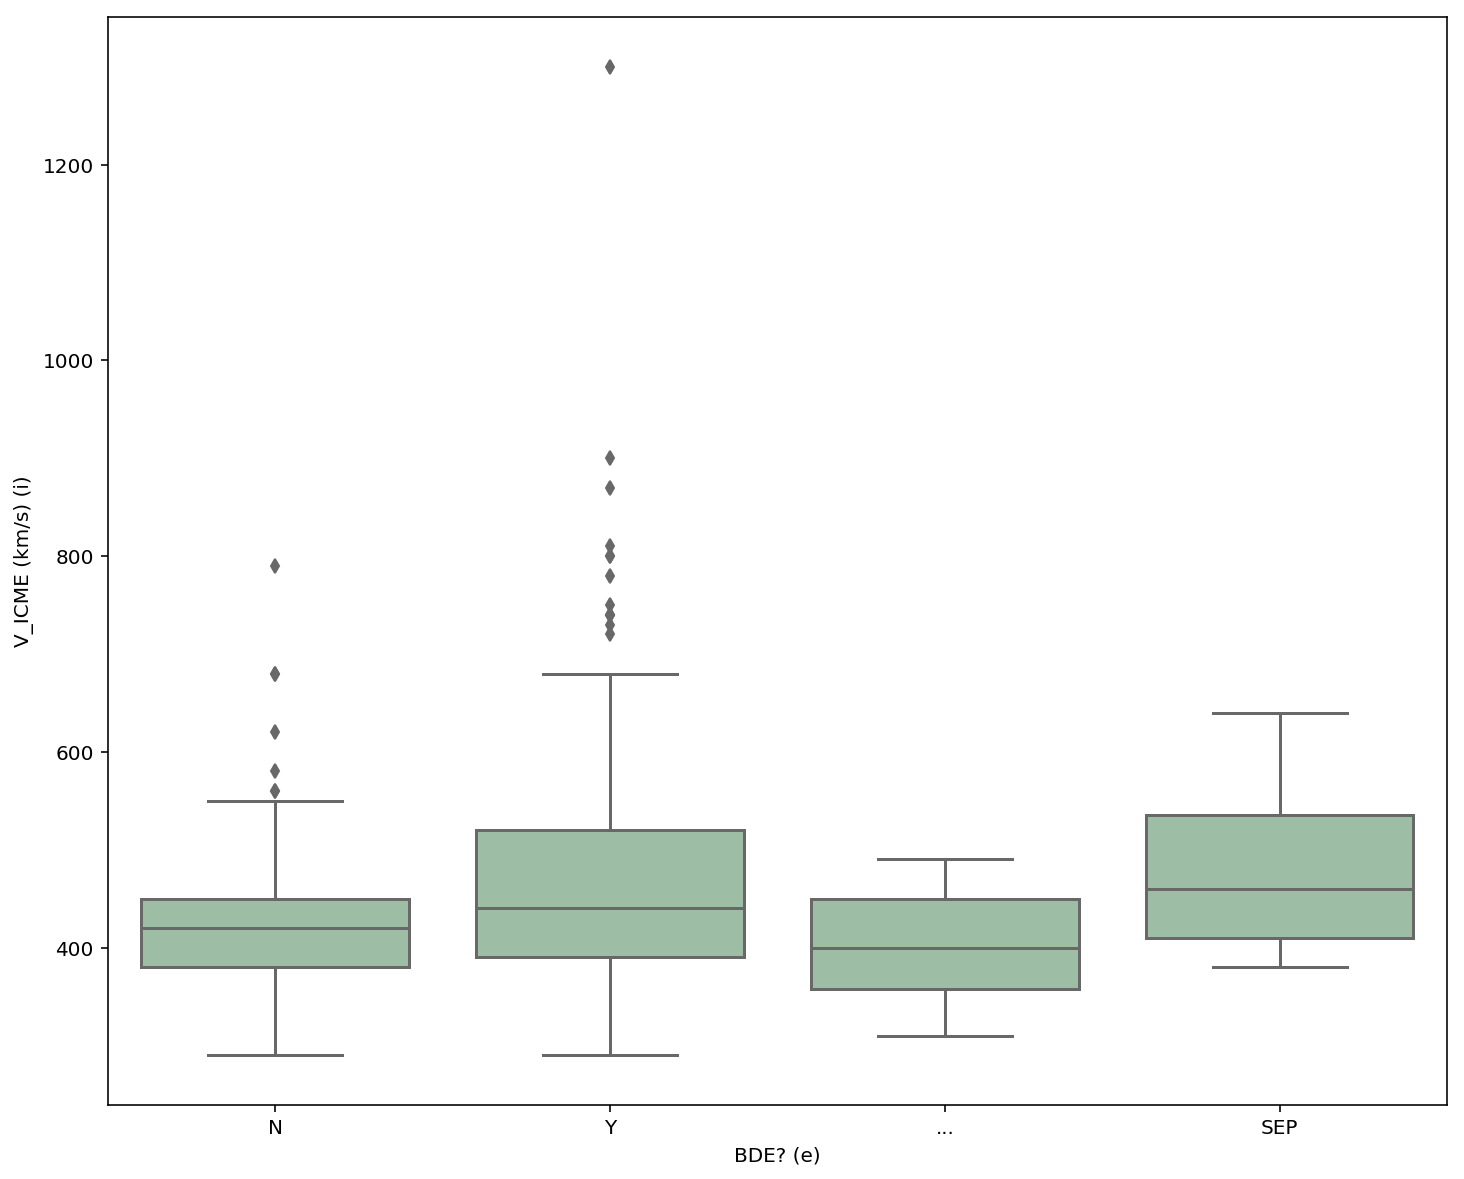

In [19]:
# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(12,10))
sns.boxplot(x=col1, y=col2_numer, data=df, color='#99c2a2')
plt.show()

In [20]:
ICME_V_BDE_1 = df[df['Qual. (g)'] == '1']['V_ICME (km/s) (i)']
ICME_V_BDE_2 = df[df['Qual. (g)'] == '2']['V_ICME (km/s) (i)']
ICME_V_BDE_3 = df[df['Qual. (g)'] == '3']['V_ICME (km/s) (i)']
ICME_V_BDE_2W = df[df['Qual. (g)'] == '2W']['V_ICME (km/s) (i)']
ICME_V_BDE_3W = df[df['Qual. (g)'] == '3W']['V_ICME (km/s) (i)']

In [21]:
print('1 ', ICME_V_BDE_1.mean())
print('2 ', ICME_V_BDE_2.mean())
print('3 ', ICME_V_BDE_3.mean())
print('2W ', ICME_V_BDE_2W.mean())
print('3W ', ICME_V_BDE_3W.mean())

1  464.5360824742268
2  463.1764705882353
3  441.85483870967744
2W  401.25
3W  411.7241379310345


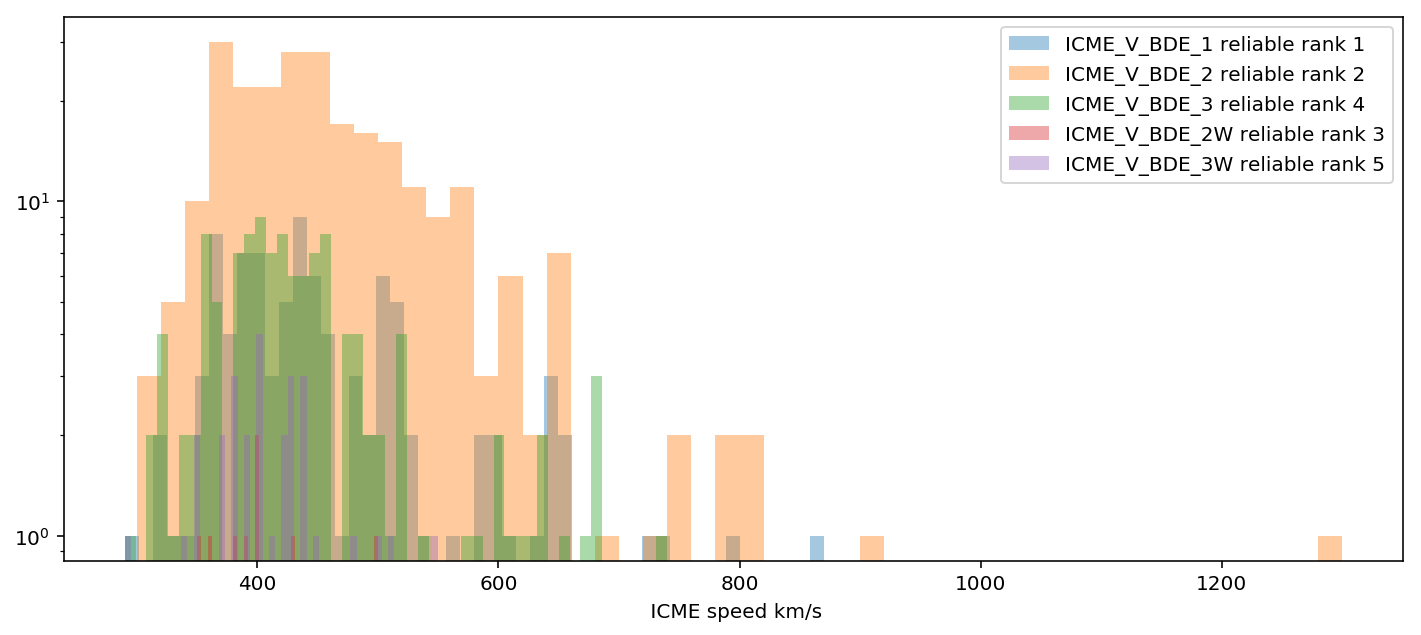

In [22]:
plt.figure(figsize=(12,5))
plt.hist(ICME_V_BDE_1, bins=50, alpha=0.4, label='ICME_V_BDE_1 reliable rank 1', log=True)
plt.hist(ICME_V_BDE_2, bins=50, alpha=0.4,label='ICME_V_BDE_2 reliable rank 2', log=True)
plt.hist(ICME_V_BDE_3, bins=50, alpha=0.4, label='ICME_V_BDE_3 reliable rank 4', log=True)
plt.hist(ICME_V_BDE_2W, bins=50, alpha=0.4,label='ICME_V_BDE_2W reliable rank 3', log=True)
plt.hist(ICME_V_BDE_3W, bins=50, alpha=0.4, label='ICME_V_BDE_3W reliable rank 5', log=True)
plt.xlabel(' ICME speed km/s')
plt.legend()
plt.savefig('../Figures/Statistical_Analysis_H0_2.png')
plt.show()

I see that the average ICME speed is different across different data qualities. is this difference is due to noise? or is it statistically significant?

So I can have the following alternative hypothesis:


<span style="color:gray">
    
H0: The average solar wind speed is not different across data with different reliability.


</span>


<span style="color:red">
    
## Ha: Average solar wind speed is different depending on the data quality (reliability). In another word, the quality of data affects the reported ICME speed.

</span>



One way is to carry out several pairs of t-test but that might increase the chance of getting False positive (rejecting the null hypothesis and accepting alternative hypothesis)

In [23]:
stats.f_oneway(ICME_V_BDE_1,ICME_V_BDE_2,ICME_V_BDE_3,ICME_V_BDE_2W, ICME_V_BDE_3W)

F_onewayResult(statistic=2.9485437566815804, pvalue=0.01987754290191895)

based on ANOVA one way test, there is a significant difference between the means. In another word, the average ICME speed is changed across different data reliability.


<span style="color:green">
    
## Ha: The average ICME speed is changed across different data reliability.

</span>



I got significant results here and I am wondering which category or pair of categories (in this case, the data reliability) causes these significant results. I carry out the post-hoc test to find out.

In [24]:
my_list = [ICME_V_BDE_1,
           ICME_V_BDE_2,
           ICME_V_BDE_3,
           ICME_V_BDE_2W, 
           ICME_V_BDE_3W]


my_list_names = ['ICME_V_BDE_1',
               'ICME_V_BDE_2',
               'ICME_V_BDE_3',
               'ICME_V_BDE_2W', 
               'ICME_V_BDE_3W']


list_pair = []
for name1 in my_list:
    for name2 in my_list:
        list_pair.append((name1, name2))

list_pair_names = []      
for name1 in my_list_names:
    for name2 in my_list_names:
        list_pair_names.append((name1, name2))       
        

        
for i, (a, b) in enumerate(list_pair):
    
    p_val = stats.ttest_ind(a = a, b = b)[1]
    if p_val < 0.05:
        
        print(list_pair_names[i])

        print(stats.ttest_ind(a = a, b = b))      
        print(20*'=')

('ICME_V_BDE_1', 'ICME_V_BDE_3W')
Ttest_indResult(statistic=2.5510780520652956, pvalue=0.011954863596576232)
('ICME_V_BDE_2', 'ICME_V_BDE_3W')
Ttest_indResult(statistic=2.447424954103449, pvalue=0.0149981995796097)
('ICME_V_BDE_3W', 'ICME_V_BDE_1')
Ttest_indResult(statistic=-2.5510780520652956, pvalue=0.011954863596576232)
('ICME_V_BDE_3W', 'ICME_V_BDE_2')
Ttest_indResult(statistic=-2.447424954103449, pvalue=0.0149981995796097)


3W category is observed in all significant results. Therefore I can say that this is the reason I get significant results from the ANOVA test. 

Note that as I carry out more t-tests, there is more likely I get significant results. One way to overcome that is to adjust the alpha value (p-value). We can use a more conservative alpha value in this case,. simply by dividing the p-value by a number of comparisons (0.002!). This adjustment is well known as Bonferroni Correction.


Note that using Bonferroni correction, we can end up rejecting lots of significant results (lots of False negatives).

## dV (km/s) (h)

Increase in solar wind speed at the upstream disturbance (shock/wave) estimated from 1 hour averaged solar wind data. 'S' indicates that a forward fast shock has been reported in the ACE List of Disturbances and Transients or Kasper Shock list (including ACE and WIND observations)

# Q: 




<span style="color:red">
    
## Does the solar wind speed is higher/lower when the forward fast shock happens?

</span>

Let's take a look at the data and observed the mean of solar wind across different categories.

In [25]:
col1 = 'dV (km/s) (h)'
col2_numer = 'V_ICME (km/s) (i)'

# print('num of uniq', col1 ,'  \n', df[col1].unique())
# df[col1].unique()

# target_grp = df.groupby([col1])

# plt.figure(figsize=(15,5))
# target_grp[col2_numer].mean().plot.bar()
# plt.xlabel(col2_numer)
# plt.show()

In [26]:
# # https://www.reneshbedre.com/blog/anova.html
# plt.figure(figsize=(17,10))

# ax = sns.boxplot(x=col1, y=col2_numer, data=df, palette="vlag")
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

# ax = sns.swarmplot(x=col1, y=col2_numer, data=df, color='#7d0013')
# plt.show()

add a new columns with yes/no and then hue the boxplot based on it.

In [27]:
# https://stackabuse.com/python-check-if-string-contains-substring/
emp_list= []
for i in df['dV (km/s) (h)']:
    
    fullstring = i
    substring = "S"

    if fullstring.find(substring) != -1:
#         print("Found!")
        emp_list.append('Yes')
    else:
#         print("Not found!")
        emp_list.append('No')
    
df['forward fast shock happens'] = emp_list

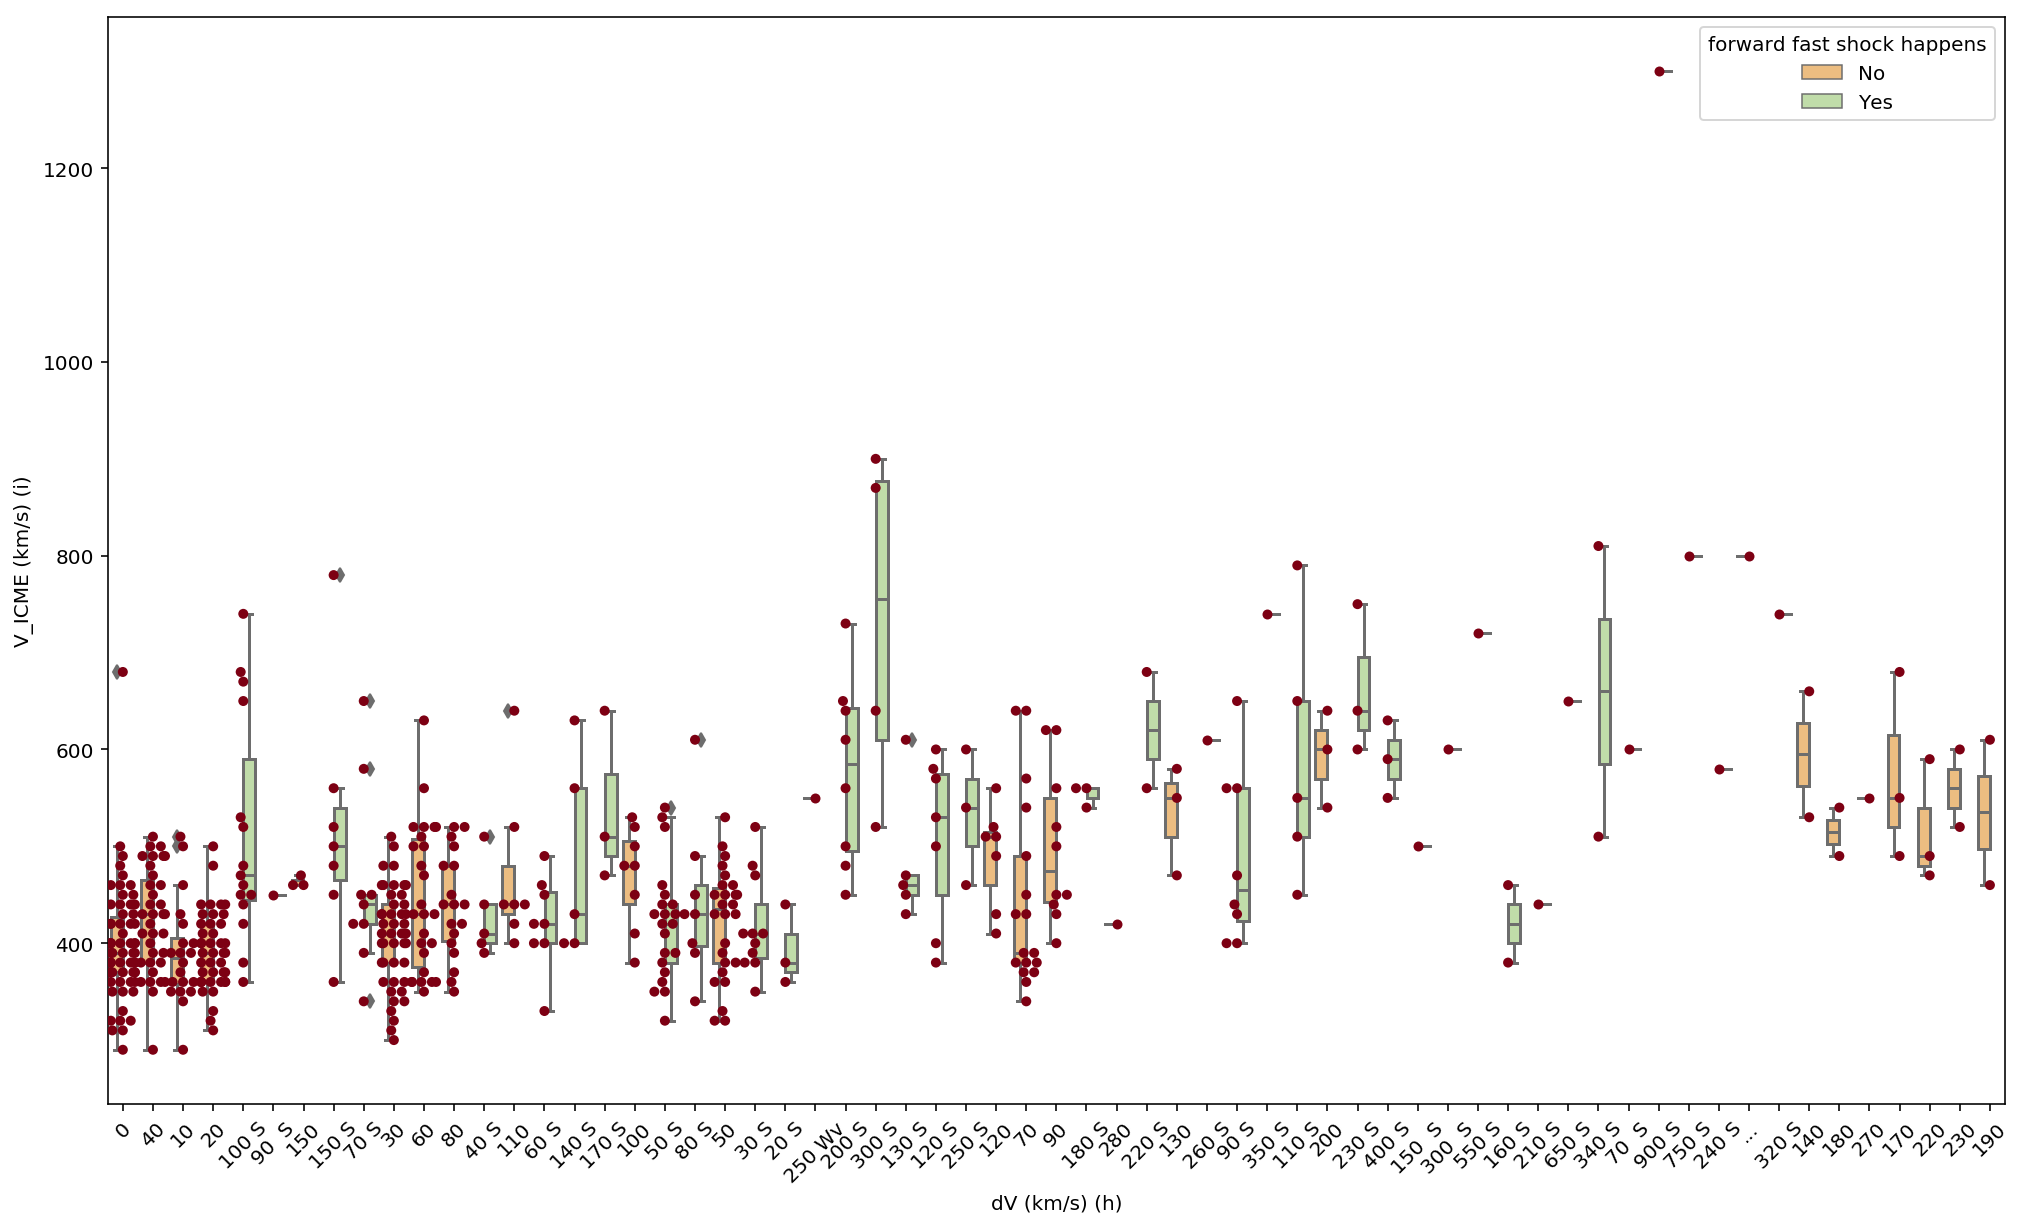

In [28]:
# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(17,10))

ax = sns.boxplot(x=col1, y=col2_numer, data=df, palette="Spectral", 
                 hue=df['forward fast shock happens'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

ax = sns.swarmplot(x=col1, y=col2_numer, data=df, color='#7d0013')
plt.show()

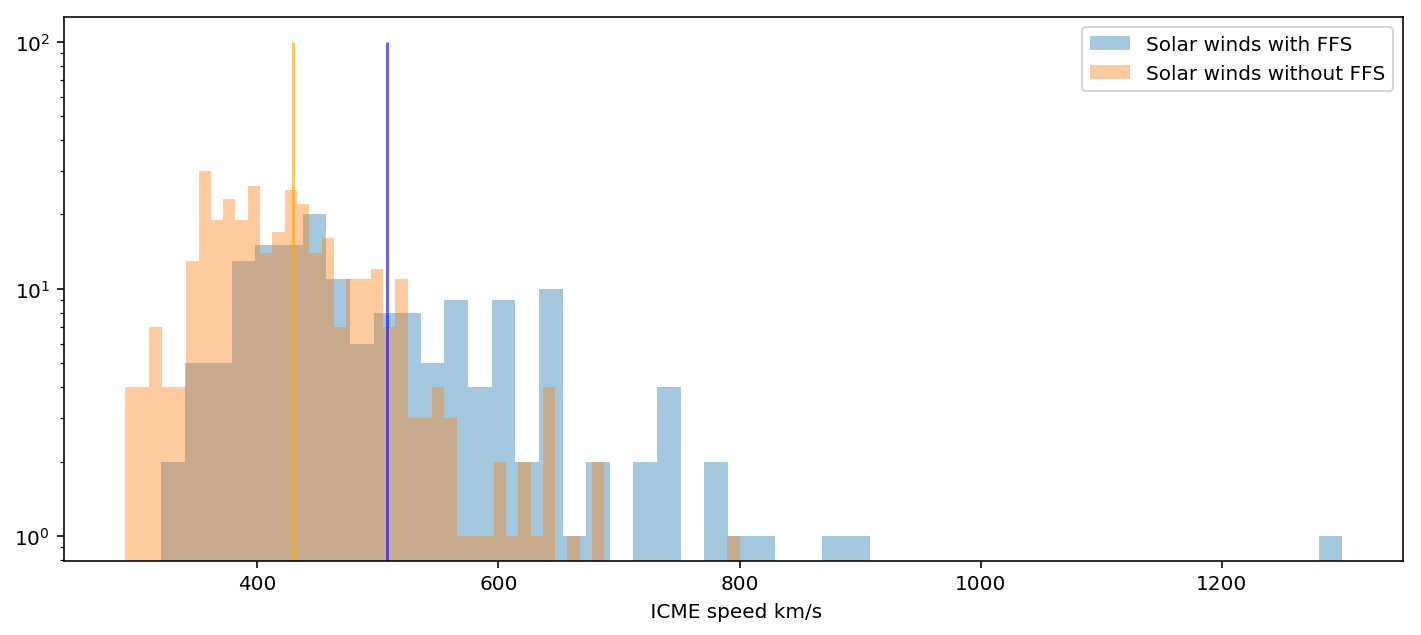

In [112]:
ICME_V_FFS_Yes = df['V_ICME (km/s) (i)'][df['forward fast shock happens'] == 'Yes']
ICME_V_FFS_No = df['V_ICME (km/s) (i)'][df['forward fast shock happens'] == 'No']

plt.figure(figsize=(12,5))
plt.hist(ICME_V_FFS_Yes, bins=50, alpha=0.4, label='Solar winds with FFS', log=True)
plt.hist(ICME_V_FFS_No, bins=50, alpha=0.4,label='Solar winds without FFS', log=True)

plt.vlines(ICME_V_FFS_Yes.mean(), 0, 100, colors='blue', alpha=0.6)
plt.vlines(ICME_V_FFS_No.mean(), 0, 100, colors='orange', alpha=0.6)

plt.xlabel(' ICME speed km/s')
plt.legend()
plt.savefig('../Figures/Statistical_Analysis_3.png')
plt.show()

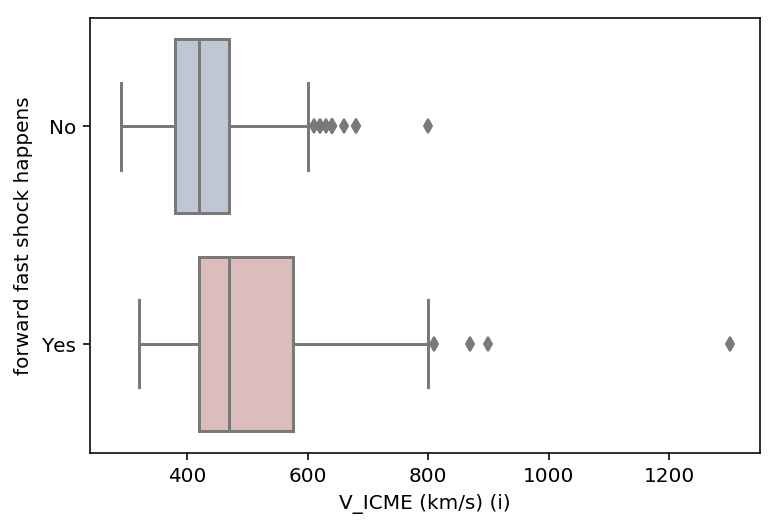

In [29]:
col1 = 'forward fast shock happens'
col2_numer = 'V_ICME (km/s) (i)'

ax = sns.boxplot(y=col1, x=col2_numer, data=df, palette="vlag")

In [30]:
ICME_V_FFS_Yes = df['V_ICME (km/s) (i)'][df['forward fast shock happens'] == 'Yes']
ICME_V_BDE_No = df['V_ICME (km/s) (i)'][df['forward fast shock happens'] == 'No']

print('yes ', ICME_V_FFS_Yes.mean())
print('no ', ICME_V_BDE_No.mean())

yes  507.60736196319016
no  429.62857142857143


I can see that there is a difference between ICME speed during fast forward shocks occurs. Is this difference statistically significant? Can I conclude that those cases in which fast forward shock happens have a higher speed?
Let's use a two-sample t-test (independent) to figure that out and come up with a solid conclusion.


In [31]:
stats.ttest_ind(a = ICME_V_FFS_Yes,
                b = ICME_V_BDE_No)

Ttest_indResult(statistic=8.47372545858315, pvalue=2.5521435592192815e-16)

I got p-value pretty small and I reject the Null Hypothesis (H0) and accept the alternative hypothesis (Ha).


<span style="color:green">
    
## Ha: solar wind speed is higher in average when the forward fast shock happens.

</span>
    

In [32]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)', 'forward fast shock happens'],
      dtype='object')

## Mean magnetic field strength


(k) Mean magnetic field strength in the ICME, based on the interval from (b) to (c), to the nearest 1 nT.




<span style="color:red">
    
## Q: Is there is a significant correlation between solar wind speed and the mean magnetic field. Does solar wind speeds for cases with higher mean magnetic filed, have higher speeds?

</span>

In [64]:
pg.corr(x=df['V_ICME (km/s) (i)'], y=df['B (nT) (k)'])

,n,r,CI95%,p-val,BF10,power
pearson,513,0.211452,"[0.13, 0.29]",0.000001,6291.45,0.998091


Based on the achieved p-value, solar wind speed and mean magnetic field strength are correlated.




<span style="color:green">
    
## Ha: There is a significant correlation between solar wind speed and the mean magnetic field. I observed that those cases with the higher mean magnetic fields have higher solar wind speeds.

</span>

In [62]:
# !/Users/amin/anaconda3/bin/python -m pip install pingouin 

some references:
* [stat in python](https://www.youtube.com/watch?v=EWYzeZbchR0&t=719s)